## Introduction to Pandas

[Pandas](http://pandas.pydata.org/) is the essential data analysis library for Python programmers. It provides fast and flexible data structures built on top of [numpy](http://www.numpy.org/).

It is well suited to handle "tabular" data (that might be found in a spreadsheet), time series data, or pretty much anything you care to put in a matrix with rows and named columns.

It contains two primary data structures, the `Series` (1-dimensional) and the `DataFrame` (2-dimensional) as well as a host of convenience methods for loading and plotting data.


In [1]:
# The canonical way to import pandas:
import pandas as pd

In [2]:
%matplotlib inline

Let's dive right in by loading a dataset.

In [3]:
df = pd.read_csv("data/Speed_Camera_Violations.csv")

The variable `df` (which is a common abbreviation for "DataFrame") now contains a pandas `DataFrame` object. This particular `DataFrame` contains speed camera violation data provided by the city of Chicago. This dataset is available at [https://catalog.data.gov/dataset/speed-camera-violations-997eb](https://catalog.data.gov/dataset/speed-camera-violations-997eb).

Let's start inspecting it by using the `head` method to look at the first five rows.

In [4]:
df.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,7738 S WESTERN,CHI065,07/08/2014,65,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,07/16/2014,56,NaN,NaN,NaN,NaN,NaN
2,5520 S WESTERN,CHI069,07/08/2014,10,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,07/26/2014,101,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,07/27/2014,92,NaN,NaN,NaN,NaN,NaN


### About DataFrames

As you can see above, DataFrames contain "tabular" (2-dimensional) data, meaning they have rows and columns.

Each colum has a name, and each row has a label (by default, the labels are integers). This set of row labels in pandas is called an `Index`.

This allows us to address any "cell" in the DataFrame by its row label and column name:

In [5]:
# display just the first row (note the index is zero-based, meaning the first row is row 0)
# `loc` is an "indexer" in Pandas terminology, meaning a property of the DataFrame we can use to
# access specific values within it.
df.loc[0]

ADDRESS           7738 S WESTERN
CAMERA ID                 CHI065
VIOLATION DATE        07/08/2014
VIOLATIONS                    65
X COORDINATE                 NaN
Y COORDINATE                 NaN
LATITUDE                     NaN
LONGITUDE                    NaN
LOCATION                     NaN
Name: 0, dtype: object

In [6]:
# We can also address a single column of the DataFrame using its name in square brackets:
df["ADDRESS"]

0               7738 S WESTERN
1              1111 N HUMBOLDT
2               5520 S WESTERN
3              1111 N HUMBOLDT
4              1111 N HUMBOLDT
5               5529 S WESTERN
6              1111 N HUMBOLDT
7               5520 S WESTERN
8               5520 S WESTERN
9               5520 S WESTERN
10              5529 S WESTERN
11              5520 S WESTERN
12              5529 S WESTERN
13              5529 S WESTERN
14              5520 S WESTERN
15             1111 N HUMBOLDT
16             1111 N HUMBOLDT
17              5520 S WESTERN
18             1111 N HUMBOLDT
19              7739 S WESTERN
20             1111 N HUMBOLDT
21              5520 S WESTERN
22             1111 N HUMBOLDT
23              5529 S WESTERN
24             1111 N HUMBOLDT
25             1111 N HUMBOLDT
26              7738 S WESTERN
27              5529 S WESTERN
28              5529 S WESTERN
29              5529 S WESTERN
                  ...         
113966    1315 W GARFIELD BLVD
113967  

In [7]:
# We can combine the row-based and column-based access with the `loc` indexer to select specific "elements"
df.loc[1, "ADDRESS"]

'1111 N HUMBOLDT'

In [8]:
# Or a set of rows and columns. Note we can ask for a list of columns in any order:
df.loc[1000:1010, ["ADDRESS", "VIOLATION DATE"]]

,ADDRESS,VIOLATION DATE
1000,2443 N ASHLAND,10/22/2014
1001,1111 N HUMBOLDT,10/22/2014
1002,515 S CENTRAL AVE,10/22/2014
1003,4433 N WESTERN,10/22/2014
1004,6909 S KEDZIE,10/22/2014
1005,2513 W 55TH,10/22/2014
1006,2440 W 51ST ST,10/22/2014
1007,4965 S ARCHER,10/22/2014
1008,5440 W GRAND,10/22/2014
1009,6443 W BELMONT AVE,10/22/2014


## About Series

Each column in the DataFrame is a `Series` object. You can think of a `Series` as an `ndarray` from numpy with an `Index` (the same row-label functionality from `DataFrame`).

The important thing to remember is that each element in the `Series` has the same type, just like an `ndarray`.

The `dtype` property of a `Series` tells us what its type is.

In [9]:
print(df.columns)
print()
for col in df.columns:
    print("The dtype of %s is %s." % (col, df[col].dtype))

Index(['ADDRESS', 'CAMERA ID', 'VIOLATION DATE', 'VIOLATIONS', 'X COORDINATE',
       'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

The dtype of ADDRESS is object.
The dtype of CAMERA ID is object.
The dtype of VIOLATION DATE is object.
The dtype of VIOLATIONS is int64.
The dtype of X COORDINATE is float64.
The dtype of Y COORDINATE is float64.
The dtype of LATITUDE is float64.
The dtype of LONGITUDE is float64.
The dtype of LOCATION is object.


## Data types

Much of pandas functionality depends on the data types of the `Series` it's working with. For instance we can get summary measures and do numpy-like parallel operations on numeric types (`int64`, `float64`), or do date-based arithmetic with `date` series.

Notice above that the data type of the `VIOLATION DATE` column is "object", which, just like in numpy, means it is a generic type that isn't very useful. Let's turn those date strings into actual date objects, which are much better to work with.


In [10]:
# given a Series, pd.to_datetime returns a new Series with the string dates parsed as actual dates.
# We can then directly assign that Series back to the original column in our dataframe and pandas' magical Index
# functionality will make it all line up properly.
df["VIOLATION DATE"] = pd.to_datetime(df["VIOLATION DATE"], format="%m/%d/%Y")

df["VIOLATION DATE"].head()

0   2014-07-08
1   2014-07-16
2   2014-07-08
3   2014-07-26
4   2014-07-27
Name: VIOLATION DATE, dtype: datetime64[ns]

## Filtering

Now that we have a date column, we can do things like filter to only look at violations in 2015.

To do this, we'll create a "filter", essentially a boolean expression that works just like a mask or "fancy indexing" expression in numpy, and apply that filter to our dataframe to get just the rows we want.


In [11]:
import datetime

# note the extra parentheses below, these are necessary when creating a boolean filter expression with
# multiple comparisons like this
date_filter = ((df["VIOLATION DATE"] >= datetime.date(2015,1,1)) & (df["VIOLATION DATE"] < datetime.date(2016,1,1)))

# date_filter now contains a series of true/false values that we can use to extract just the values we are interested in
# by putting it in square brackets after the dataframe variable.
print(date_filter.head())
print()
print(date_filter.tail())

df_2015 = df[date_filter]

df_2015.head()

0    False
1    False
2    False
3    False
4    False
Name: VIOLATION DATE, dtype: bool

113991     True
113992     True
113993    False
113994     True
113995     True
Name: VIOLATION DATE, dtype: bool


,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
285,2912 W ROOSEVELT,CHI020,2015-01-07,8,1.157040e+06,1.894612e+06,41.866585,-87.698962,"(41.86658528313424, -87.69896237494204)"
286,5816 W JACKSON,CHI058,2015-01-07,22,1.137565e+06,1.898341e+06,41.877189,-87.770370,"(41.87718940463045, -87.7703695017756)"
287,57 E 95TH,CHI035,2015-01-07,4,1.178587e+06,1.841967e+06,41.721657,-87.621463,"(41.72165713317433, -87.62146289865515)"
288,324 S KEDZIE AVE,CHI123,2015-01-07,4,1.155058e+06,1.898247e+06,41.876599,-87.706143,"(41.87659894232968, -87.70614267856668)"
289,5471 W HIGGINS,CHI102,2015-01-07,14,1.139072e+06,1.931898e+06,41.969247,-87.764019,"(41.96924714863934, -87.76401945149458)"


This kind of filtering works for any kind of data type, provided you take care to make sure pandas is using the right data types for your data!

You may have noticed that many of the rows in this dataframe are missing lat/lon data. Pandas uses the "NaN" placeholder for missing data and offers some methods for dealing with it.

Both `Series` and `DataFrame` objects have `fillna` method that will replace missing data with a specified value.

In thise case however we may want to just drop those records that have missing data entirely:


In [12]:
df_no_nans = df.dropna(axis=0, how="any")
df_no_nans.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
148,2912 W ROOSEVELT,CHI020,2014-10-16,25,1.157040e+06,1.894612e+06,41.866585,-87.698962,"(41.86658528313424, -87.69896237494204)"
149,346 W 76th ST,CHI136,2014-10-16,4,1.175112e+06,1.854590e+06,41.756374,-87.633817,"(41.7563743554102, -87.6338165847716)"
150,11153 S VINCENNES,CHI022,2014-10-16,6,1.167029e+06,1.830594e+06,41.690702,-87.664122,"(41.690701951255015, -87.66412238501842)"
151,5454 W IRVING PARK,CHI050,2014-10-16,82,1.139043e+06,1.926097e+06,41.953330,-87.764267,"(41.95332954454448, -87.76426726425451)"
152,5446 W FULLERTON,CHI042,2014-10-16,38,1.139460e+06,1.915458e+06,41.924128,-87.762994,"(41.92412849125162, -87.76299399881007)"


## Summary Measures

Pandas will produce simple descriptive statics via the `describe` method:

In [13]:
df["VIOLATIONS"].describe()

count    113996.000000
mean         30.708349
std          38.773222
min           1.000000
25%           7.000000
50%          17.000000
75%          39.000000
max         479.000000
Name: VIOLATIONS, dtype: float64

There are many more built-in methods for producing summary measures which can be found in the [documentation](https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats).

For instance, generating quantiles is straightforward:

In [14]:
# deciles, in this case
for i in range(1, 11):
    print("Value at decile %s: %s" % (i/10, df["VIOLATIONS"].quantile(i/10)))

Value at decile 0.1: 3.0
Value at decile 0.2: 5.0
Value at decile 0.3: 9.0
Value at decile 0.4: 12.0
Value at decile 0.5: 17.0
Value at decile 0.6: 23.0
Value at decile 0.7: 33.0
Value at decile 0.8: 47.0
Value at decile 0.9: 74.0
Value at decile 1.0: 479.0


## Grouping

With data like this, the questions we might want to ask immediately are which camera locations or days of the week have produced the most violations. To do that we need to group records together, and Pandas is designed for exactly this sort of work.

Let's investigate the top 10 locations with the most violations.


In [15]:
# first let's group by address and look at descriptive statistics for the first 10 records
df.groupby(["ADDRESS"])["VIOLATIONS"].describe().head()

,count,mean,std,min,25%,50%,75%,max
ADDRESS,,,,,,,,
10318 S INDIANAPOLIS,1084.0,99.974170,39.412342,4.0,72.00,96.0,120.25,259.0
1110 S PULASKI RD,499.0,22.412826,15.078174,1.0,11.00,18.0,31.00,83.0
1111 N HUMBOLDT,1096.0,58.250000,18.067744,6.0,46.00,57.0,70.00,117.0
11144 S VINCENNES,526.0,19.612167,10.058579,1.0,12.25,18.0,25.00,75.0
11153 S VINCENNES,517.0,9.698259,5.182134,1.0,6.00,9.0,13.00,31.0


The above records aren't sorted in any meaningful way, but the first thing to note is that the Index is no longer just an integer, it is now the Address. This is because the `groupby` method returns a special object with a new index made up of the 
values of the column being grouped on.

We can still use the `loc` indexer with this new grouped object to, for example, find the count for a given address:

In [16]:
# `count` returns the number of rows for this address, not the total violation count.
# IE this tells us the number of observations.
df.groupby(["ADDRESS"])["VIOLATIONS"].count().loc["19 W CHICAGO AVE"]

432

In [17]:
# to get the total violation count, we want the `sum` method:
df.groupby(["ADDRESS"])["VIOLATIONS"].sum().loc["19 W CHICAGO AVE"]

1618

In [18]:
# Now let's get the top 10 camera locations by total violation count:
df.groupby(["ADDRESS"])["VIOLATIONS"].sum().sort_values(ascending=False).head(10)

ADDRESS
4909 N CICERO AVE       220704
445 W 127TH             169337
2900 W OGDEN            139183
4124 W FOSTER AVE       127071
10318 S INDIANAPOLIS    108372
2705 W IRVING PARK      107599
1142 W IRVING PARK       91874
536 E MORGAN DR          82331
5816 W JACKSON           80174
4831 W LAWRENCE AVE      69538
Name: VIOLATIONS, dtype: int64

In [19]:
# Of course it's possible we just have more observations for some locations than others, so let's look
# at the top 10 by mean violation count per observation:
df.groupby(["ADDRESS"])["VIOLATIONS"].mean().sort_values(ascending=False).head(10)

ADDRESS
4909 N CICERO AVE       226.595483
445 W 127TH             154.645662
2900 W OGDEN            126.876026
4124 W FOSTER AVE       120.332386
10318 S INDIANAPOLIS     99.974170
2705 W IRVING PARK       99.078269
215 E 63RD ST            84.689008
1142 W IRVING PARK       84.210816
536 E MORGAN DR          75.188128
2549 W ADDISON           73.668488
Name: VIOLATIONS, dtype: float64

How about days of the week? *When* are people most likely to be caught running red lights?

The simplest way to do this is to create a new weekday column and group on that.

In [20]:
# datetime series have a special `dt` property that exposes the date/time-specific functionality.
# In this case, dayofweek is a 0-based index where 0 = Monday, 6 = Sunday.
df["VIOLATION DATE"].dt.dayofweek.head()

0    1
1    2
2    1
3    5
4    6
Name: VIOLATION DATE, dtype: int64

In [21]:
df["DAY OF WEEK"] = df["VIOLATION DATE"].dt.dayofweek
df.groupby(["DAY OF WEEK"])["VIOLATIONS"].sum()

DAY OF WEEK
0    490581
1    506821
2    498217
3    519486
4    539902
5    478854
6    466768
Name: VIOLATIONS, dtype: int64

## Plotting

It's not easy to understand at a glance the distribution of red light violations by day of the week above, so let's produce a simple plot to visualize and help understand it.

Pandas has a number of convenience functions to let us output plots directly without having to interact with matplotlib.

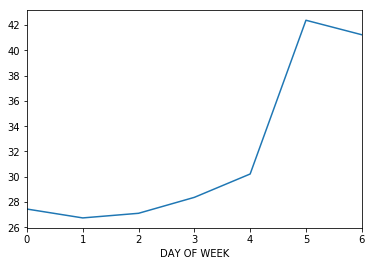

In [22]:
# We can call `plot` on just about anything to get a minimally-formatted plot
df.groupby(["DAY OF WEEK"])["VIOLATIONS"].mean().plot()

We can do much better. Let's do a horizontal bar plot, renaming the labels to the actual days of the week, and starting the X-axis at 0 to give a better sense of how much this data actually varies.

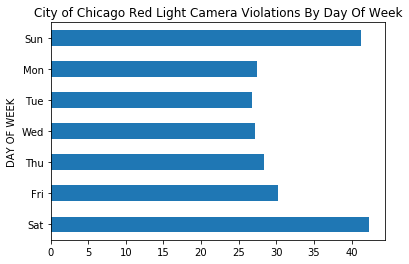

In [23]:
# Create a mapping of day number to day name
daynames = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}

# save the "sum of violations grouped-by day of week" series in a variable
violations_by_day_of_week = df.groupby(["DAY OF WEEK"])["VIOLATIONS"].mean()

# use the mapping created above to give the series index labels sensible values
violations_by_day_of_week.rename(index=daynames, inplace=True)

# use the reindex method to order them the way we want in the plot (starting with Sunday at the top of the y axis)
violations_by_day_of_week = violations_by_day_of_week.reindex(["Sat", "Fri", "Thu", "Wed", "Tue", "Mon", "Sun"])

# and finally, create the bar plot
violations_by_day_of_week.plot(kind='barh', title="City of Chicago Red Light Camera Violations By Day Of Week")

## Combining DataFrames

Often you will need to combine data from multiple data sets together. There are two types of combinations: concatenations and merges (aka joins).

**Concatenating** means taking multiple DataFrame objects and appending their rows together to make a new DataFrame. In general you will do this when your datasets contain the same columns and you are combining observations of the same type together into one dataset that contains all the rows from all the datasets.

**Merging** is joining DataFrames together SQL-style by using common values. This is useful when you have multiple datasets with common keys and you want to combine them into one dataset that contains columns from all the datasets being merged.

In [24]:
# Concatenation example
df1 = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6]})

df2 = pd.DataFrame({'A': [7, 8, 9],
                    'B': [10, 11, 12]})

print("df1: ")
print(df1)
print()
print("df2: ")
print(df2)
print()
print("concatenated: ")
print(pd.concat([df1, df2]))



df1: 
   A  B
0  1  4
1  2  5
2  3  6

df2: 
   A   B
0  7  10
1  8  11
2  9  12

concatenated: 
   A   B
0  1   4
1  2   5
2  3   6
0  7  10
1  8  11
2  9  12


In [25]:
# Merge example
df1 = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6]})

df2 = pd.DataFrame({'A': [1, 2, 3],
                    'C': ["foo", "bar", "baz"]})

print("df1: ")
print(df1)
print()
print("df2: ")
print(df2)
print()
print("merged: ")
print(pd.merge(df1, df2))


df1: 
   A  B
0  1  4
1  2  5
2  3  6

df2: 
   A    C
0  1  foo
1  2  bar
2  3  baz

merged: 
   A  B    C
0  1  4  foo
1  2  5  bar
2  3  6  baz
